# Titanic Project

Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Check for null
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So there are null values in Age, Cabin and Embarked which we need to handle very carefully

Let’s take a more detailed look at what percent of data is actually missing

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Count', '% of Missing Data'])
missing_data.head(5)

,Total Count,% of Missing Data
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. 

It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. 

The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77.1 % of it are missing.

# Check for Duplicates

In [6]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


No Dpulicate record is found

# Data Description

PassengerId: It is the id given to each traveller on the ship.

Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)

The Name of the passeger

The Sex

The Age

SibSp: number of siblings and spouses traveling with the passenger

Parch: number of parents and children traveling with the passenger

The ticket number issued to a passenger

The ticket Fare charged to a Passenger

The cabin number

The embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Passenger id is the id given to each passenger and it has nothing to do in the whole data.

Survived : It is either 0 or 1 , where 0 means not survived and 1 means survived

Pclass : It is the ticket class, 1st class, 2nd class or 3rd class

Age : The age of the person aboard the Titanic lies between 0.42 (i.e Infants) and 80 years (old aged). Though 75% of the range lies between 0.42 to 38, so it has the maximum number of youngsters.

Sibsp : It shows that most of the person travlled alone as 75% data has only 1 in the Sibsp range. Few people travelled with more family members.

Parch: Number of parents or children abroad the Titanic, It also show 75% people dont have their parents and children, and only few people travelled along with their Children and Parents

Fare : The ticket fare ranges between 0(for infants) and 31. We see fares to few people are very high. We will analyse this further, this basically happens when they have taken good number of facilities

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Handle Missing Data

The count variable shows that 177 values are missing in the Age column.

One solution is to fill in the null values with the median age. We could also impute with the mean age but the median is more robust to outliers.

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Embarked

Since the Embarked feature has only 2 missing values, we will first see these 2 values and then will just fill these with the most common one.

In [11]:
missing_embarked = df[df['Embarked'].isnull()]
missing_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


So we see that the above two columns have missing Embarked values with Passenger ID 61 and 829, Lets fill the missing values with most common ones

In [12]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

We see that S is the most common value i Embarked, so lets fill with S

In [13]:
common_value = 'S'
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [14]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
missing_embarked = df[df['Embarked'].isnull()]
missing_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


So we have successfully filled the missing values as NO records of Embarked are missing

So, now we have filled Age and Embarked columns successfully, Lets go ahead filling Cabin

In [16]:
missing_cabin = df[df['Cabin'].notnull()]
missing_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


We have 204 values where Cabin is filled and rest is not available

In [17]:
set(df['Cabin']) 

{'A10',
 'A14',
 'A16',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C54',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D17',
 'D19',
 'D20',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D37',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E12',
 

For Cabin, I found something interesting, First lets look at few Cabin Numbers and Analyse.

C85,C123,C148 etc, all starts with Letter C..

Similarly B51 B53 B55 all starts with letter B..

So we can convert Cabin with the first letter of the availbale values A TO G and one T value. Lets check one value

In [18]:
df.iloc[np.where(df.Cabin.values=='T')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


We will fill the Cabin a new Values say U (Unknown)

In [19]:
import re
updated_Cabin = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T":8,"U": 9}
data = [df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Cabin_new'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Cabin_new'] = dataset['Cabin_new'].map(updated_Cabin)
    dataset['Cabin_new'] = dataset['Cabin_new'].fillna(0)
    dataset['Cabin_new'] = dataset['Cabin_new'].astype(int)
# we can now drop the cabin feature as we have the new feature for Cabin which is Cabin_new
df = df.drop(['Cabin'], axis=1)

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,9
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,9
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,9
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,9
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,3


In [21]:
missing_Cabin_new = df[df['Cabin_new'].isnull()]
missing_Cabin_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new


So we have no missing values in Cabin column also

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Cabin_new    891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [23]:
df.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,9


# Analyse Sex Value

In [24]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Lets check how many male and female died or Survived

In [25]:
df['Died'] = 1 - df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Died']]

,Survived,Died
Sex,,
female,233,81
male,109,468


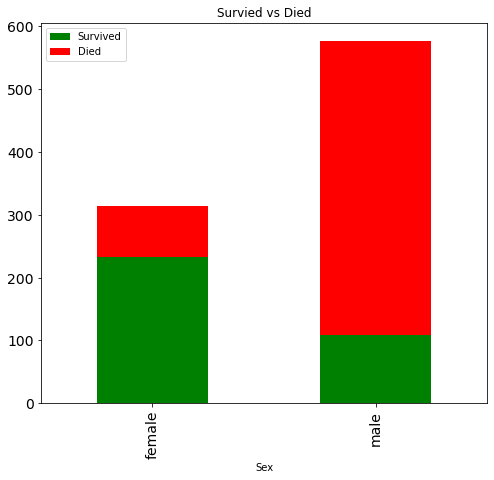

In [26]:
df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(8,7),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Survied vs Died");

It looks like more male passengers died.

Let's plot the same graph but with ratio instead.

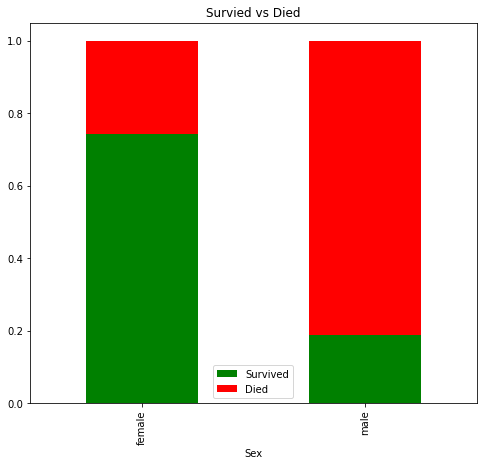

In [27]:
df.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(8, 7), 
                                                           stacked=True, color=['green', 'red'],title="Survied vs Died");

The Sex variable seems to be a discriminative feature. Women are more likely to survive.

# Check Survived Percentage

In [28]:
#Here 0 = Died & 1 = Survived 
df['Survived'].value_counts() *100/len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Let's now correlate the survival with the age variable.

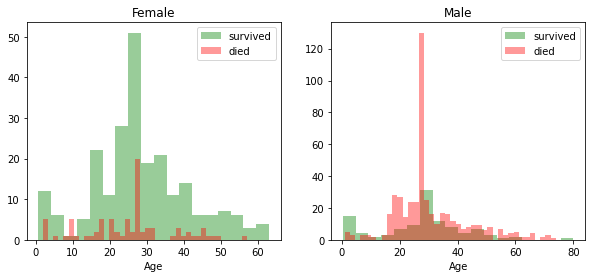

In [29]:
survived = 'survived'
not_survived = 'died'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False,color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False,color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False,color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False,color="red")
ax.set_title('Male')
ax.legend()

Now that we are done with the analysis of number of person Survived or died, lets delete the newly created Died column

In [30]:
df.drop(columns=['Died'],inplace=True)

In [31]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3


# Converting Features
We have few columns where the data type is Object, so lets convert them

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Cabin_new    891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


Above you can see that ‘Fare’ and 'Age' are float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. 

Lets investigate and transfrom one after another

In [33]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3


# Fare

In [34]:
data = [df]

for dataset in data:    
    dataset['Fare'] = dataset['Fare'].astype(int)

# Age

In [35]:
data = [df]

for dataset in data:    
    dataset['Age'] = dataset['Age'].astype(int)

In [36]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,3


# Name

In [37]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

So we see that Miss Master Mr Mrs are very common, lets check the count of each Titles so that we can combine them into one

In [38]:
df[df.Name.str.contains('the Countess', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33,0,0,110152,86,S,2


In [39]:
df[df.Name.str.contains('Sir', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new
60,61,0,3,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7,C,9
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49,1,0,PC 17485,56,C,1
837,838,0,3,"Sirota, Mr. Maurice",male,28,0,0,392092,8,S,9


In [40]:
designations = df[df.Name.str.contains('Capt. ', case=True) | df.Name.str.contains("Col. ", case=True) | 
                  df.Name.str.contains('Don. ', case=True) | df.Name.str.contains('Dr. ', case=True)|
                  df.Name.str.contains('Rev. ', case=True) | df.Name.str.contains("Jonkheer", case=True) | 
                  df.Name.str.contains('Lady. ', case=True) | df.Name.str.contains('Major. ', case=True) |
                  df.Name.str.contains('Sir. ', case=True) | df.Name.str.contains('Mme. ', case=True) |
                  df.Name.str.contains('the Countess', case=True)
                 ]
designations

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27,C,9
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42,0,0,244310,13,S,9
150,151,0,2,"Bateman, Rev. Robert James",male,51,0,0,S.O.P. 1166,12,S,9
245,246,0,1,"Minahan, Dr. William Edward",male,44,2,0,19928,90,Q,3
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54,1,0,244252,26,S,9
317,318,0,2,"Moraweck, Dr. Ernest",male,54,0,0,29011,14,S,9
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24,0,0,PC 17477,69,C,2
398,399,0,2,"Pain, Dr. Alfred",male,23,0,0,244278,10,S,9
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52,0,0,113786,30,S,3
536,537,0,1,"Butt, Major. Archibald Willingham",male,45,0,0,113050,26,S,2


In [41]:
designations['Sex'].value_counts()

male      20
female     4
Name: Sex, dtype: int64

For the titles apart from Mr Miss Mrs and Master, we will assign one commong title say Officers

In [42]:
data = [df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Officers": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Officers
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
                                                'Officers')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
df = df.drop(['Name'], axis=1)


Lets do a cross check to see if our values get updated correctly

In [43]:
df.iloc[np.where(df.Title.values==5)]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new,Title
30,31,0,1,male,40,0,0,PC 17601,27,C,9,5
149,150,0,2,male,42,0,0,244310,13,S,9,5
150,151,0,2,male,51,0,0,S.O.P. 1166,12,S,9,5
245,246,0,1,male,44,2,0,19928,90,Q,3,5
249,250,0,2,male,54,1,0,244252,26,S,9,5
317,318,0,2,male,54,0,0,29011,14,S,9,5
398,399,0,2,male,23,0,0,244278,10,S,9,5
449,450,1,1,male,52,0,0,113786,30,S,3,5
536,537,0,1,male,45,0,0,113050,26,S,2,5
556,557,1,1,female,48,1,0,11755,39,C,1,5


# Sex

In [44]:
#Map male to 0 and female to 1
genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [45]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,A/5 21171,7,S,9,1
1,2,1,1,1,38,1,0,PC 17599,71,C,3,3
2,3,1,3,1,26,0,0,STON/O2. 3101282,7,S,9,2
3,4,1,1,1,35,1,0,113803,53,S,3,3
4,5,0,3,0,35,0,0,373450,8,S,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,211536,13,S,9,5
887,888,1,1,1,19,0,0,112053,30,S,2,2
888,889,0,3,1,28,1,2,W./C. 6607,23,S,9,2
889,890,1,1,0,26,0,0,111369,30,C,3,1


In [46]:
tickets = set()
for tkt in df['Ticket']:
    tickets.add(tkt)
tickets

{'110152',
 '110413',
 '110465',
 '110564',
 '110813',
 '111240',
 '111320',
 '111361',
 '111369',
 '111426',
 '111427',
 '111428',
 '112050',
 '112052',
 '112053',
 '112058',
 '112059',
 '112277',
 '112379',
 '113028',
 '113043',
 '113050',
 '113051',
 '113055',
 '113056',
 '113059',
 '113501',
 '113503',
 '113505',
 '113509',
 '113510',
 '113514',
 '113572',
 '113760',
 '113767',
 '113773',
 '113776',
 '113781',
 '113783',
 '113784',
 '113786',
 '113787',
 '113788',
 '113789',
 '113792',
 '113794',
 '113796',
 '113798',
 '113800',
 '113803',
 '113804',
 '113806',
 '113807',
 '11668',
 '11751',
 '11752',
 '11753',
 '11755',
 '11765',
 '11767',
 '11769',
 '11771',
 '11774',
 '11813',
 '11967',
 '12233',
 '12460',
 '12749',
 '13049',
 '13213',
 '13214',
 '13502',
 '13507',
 '13509',
 '13567',
 '13568',
 '14311',
 '14312',
 '14313',
 '14973',
 '1601',
 '16966',
 '16988',
 '17421',
 '17453',
 '17463',
 '17464',
 '17465',
 '17466',
 '17474',
 '17764',
 '19877',
 '19928',
 '19943',
 '19947'

In [47]:
df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [48]:
df = df.drop(['Ticket'], axis=1)

In [49]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,7,S,9,1
1,2,1,1,1,38,1,0,71,C,3,3


In [50]:
set(df['Embarked']) 

{'C', 'Q', 'S'}

Since Embarked has only three values, C,Q and S, lets convert them to 0,1 and 2 respectively

In [51]:
embarked = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [52]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,7,0,9,1
1,2,1,1,1,38,1,0,71,1,3,3
2,3,1,3,1,26,0,0,7,0,9,2
3,4,1,1,1,35,1,0,53,0,3,3
4,5,0,3,0,35,0,0,8,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,0,9,5
887,888,1,1,1,19,0,0,30,0,2,2
888,889,0,3,1,28,1,2,23,0,9,2
889,890,1,1,0,26,0,0,30,1,3,1


# Correlation

In [53]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,7,0,9,1
1,2,1,1,1,38,1,0,71,1,3,3
2,3,1,3,1,26,0,0,7,0,9,2
3,4,1,1,1,35,1,0,53,0,3,3
4,5,0,3,0,35,0,0,8,0,9,1


In [54]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034322,-0.057527,-0.001652,0.012668,-0.030467,-0.030939,0.003878
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064909,-0.035322,0.081629,0.257482,0.106811,-0.301116,0.407753
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339999,0.083081,0.018443,-0.550553,0.045702,0.746616,-0.173929
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.080750,0.114631,0.245489,0.182331,0.116569,-0.123076,0.502713
Age,0.034322,-0.064909,-0.339999,-0.080750,1.000000,-0.233066,-0.172745,0.097064,-0.009539,-0.255832,-0.091460
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233066,1.000000,0.414838,0.159506,-0.059961,0.041540,0.269623
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172745,0.414838,1.000000,0.216252,-0.078665,-0.032548,0.315784
Fare,0.012668,0.257482,-0.550553,0.182331,0.097064,0.159506,0.216252,1.000000,0.061061,-0.523226,0.136489
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.009539,-0.059961,-0.078665,0.061061,1.000000,-0.034887,0.045400
Cabin_new,-0.030939,-0.301116,0.746616,-0.123076,-0.255832,0.041540,-0.032548,-0.523226,-0.034887,1.000000,-0.133305


<AxesSubplot:>

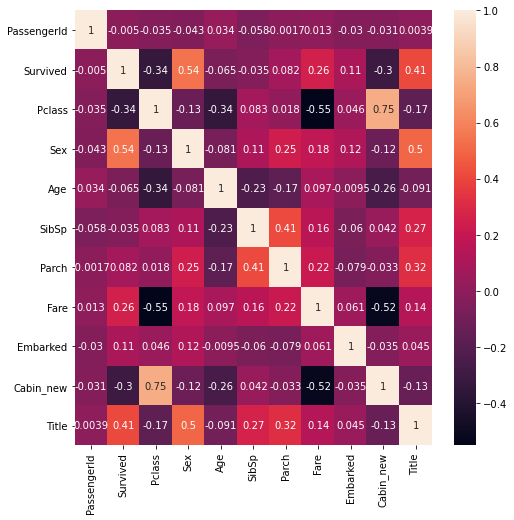

In [55]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)

From the heatmap, we see that Cabin of the passenger is correlated with Pclass and there doesnt seems to be much correlation between the two columns in our data.

Fare is also a bit corelated to Cabin and Pclass.

In [56]:
corr_matrix=df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Title          0.407753
Fare           0.257482
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064909
Cabin_new     -0.301116
Pclass        -0.338481
Name: Survived, dtype: float64

So, we have successfully converted all DataTypes now.

In [57]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,7,0,9,1
1,2,1,1,1,38,1,0,71,1,3,3
2,3,1,3,1,26,0,0,7,0,9,2
3,4,1,1,1,35,1,0,53,0,3,3
4,5,0,3,0,35,0,0,8,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,0,9,5
887,888,1,1,1,19,0,0,30,0,2,2
888,889,0,3,1,28,1,2,23,0,9,2
889,890,1,1,0,26,0,0,30,1,3,1


In [58]:
set(df['Age'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 70,
 71,
 74,
 80}

We see that age varies from 0 years to 80 years, So we can divide them into six groups


In [59]:
df['Age_Group'] = df['Age']

In [60]:
data = [df]
for dataset in data:
    dataset['Age_Group'] = dataset['Age_Group'].astype(int)
    dataset.loc[ dataset['Age_Group'] <= 10, 'Age_Group'] = 0
    dataset.loc[(dataset['Age_Group'] > 10) & (dataset['Age_Group'] <= 18), 'Age_Group'] = 1
    dataset.loc[(dataset['Age_Group'] > 18) & (dataset['Age_Group'] <= 25), 'Age_Group'] = 2
    dataset.loc[(dataset['Age_Group'] > 25) & (dataset['Age_Group'] <= 35), 'Age_Group'] = 3
    dataset.loc[(dataset['Age_Group'] > 35) & (dataset['Age_Group'] <= 50), 'Age_Group'] = 4
    dataset.loc[(dataset['Age_Group'] > 50) & (dataset['Age_Group'] <= 65), 'Age_Group'] = 5
    dataset.loc[ dataset['Age_Group'] > 65, 'Age_Group'] = 6

# let's see how it's distributed df['Age_Group'].value_counts()

In [61]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title,Age_Group
0,1,0,3,0,22,1,0,7,0,9,1,2
1,2,1,1,1,38,1,0,71,1,3,3,4
2,3,1,3,1,26,0,0,7,0,9,2,3
3,4,1,1,1,35,1,0,53,0,3,3,3
4,5,0,3,0,35,0,0,8,0,9,1,3
5,6,0,3,0,28,0,0,8,2,9,1,3
6,7,0,1,0,54,0,0,51,0,5,1,5
7,8,0,3,0,2,3,1,21,0,9,4,0
8,9,1,3,1,27,0,2,11,0,9,3,3
9,10,1,2,1,14,1,0,30,1,9,3,1


In [62]:
df['Age_Group'].value_counts()

3    373
2    162
4    153
1     75
0     64
5     56
6      8
Name: Age_Group, dtype: int64

In [63]:
df['Died']=1-df['Survived']

In [64]:
df.groupby('Age_Group').agg('sum')[['Survived', 'Died']]

,Survived,Died
Age_Group,,
0,38,26
1,32,43
2,54,108
3,135,238
4,61,92
5,21,35
6,1,7


We notice that most person died in the Age group 3 ,i.e between 25 to 35 followe by Agr group 4, i.e 35 to 50

Almost 64 kids died whose age were less than 10 and 75 people died whose ages were in the range 10 to 18.

Lets plot this using bar graph and analyse further

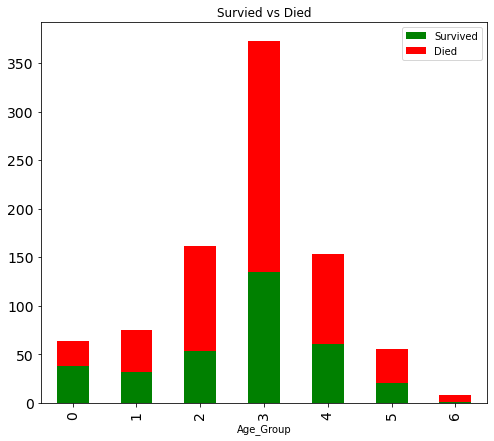

In [65]:
df.groupby('Age_Group').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(8,7),fontsize="14",stacked=True
                                                       ,color=['green', 'red'],title="Survied vs Died");

In [66]:
df.drop(columns=['Age_Group','Died'],axis=1,inplace=True)

In [67]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,7,0,9,1
1,2,1,1,1,38,1,0,71,1,3,3
2,3,1,3,1,26,0,0,7,0,9,2
3,4,1,1,1,35,1,0,53,0,3,3
4,5,0,3,0,35,0,0,8,0,9,1


# Outlier Checking

In [68]:
dataToPlot=df.loc[:, df.columns != 'Survived']
dataToPlot.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,3,0,22,1,0,7,0,9,1
1,2,1,1,38,1,0,71,1,3,3


In [69]:
targetToPlot=df.loc[:, df.columns == 'Survived']
targetToPlot.head(2)

,Survived
0,0
1,1


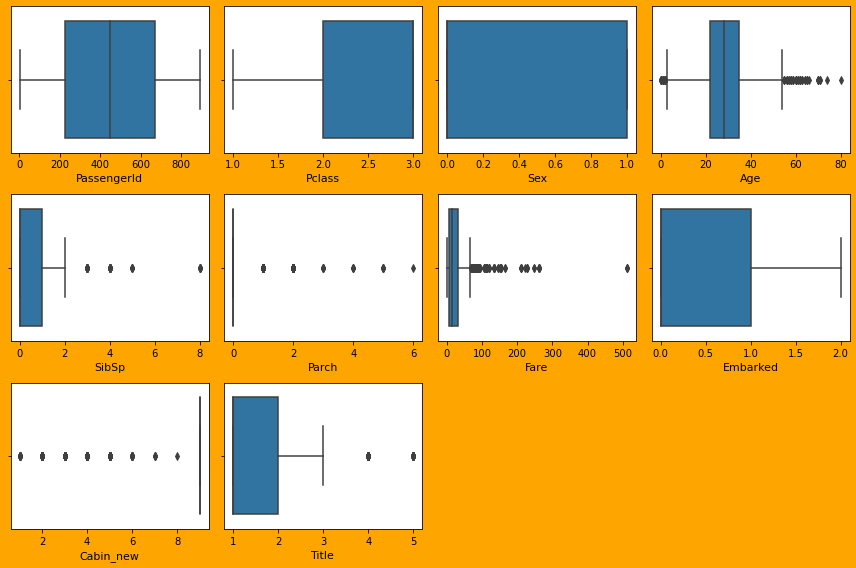

In [70]:
#Lets see data distribution
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

We notice that Age and Fare are having outliers and remaining looks to be perfect.

Few passengers have their Siblings and Spouse with themselves as Outliers and few of them have taken their Parents and Children which are shown as outlier here.


In [71]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.503570
SibSp          3.695352
Parch          2.749117
Fare           4.786430
Embarked       1.543397
Cabin_new     -1.546140
Title          1.377974
dtype: float64

In [72]:
set(df['Parch'])

{0, 1, 2, 3, 4, 5, 6}

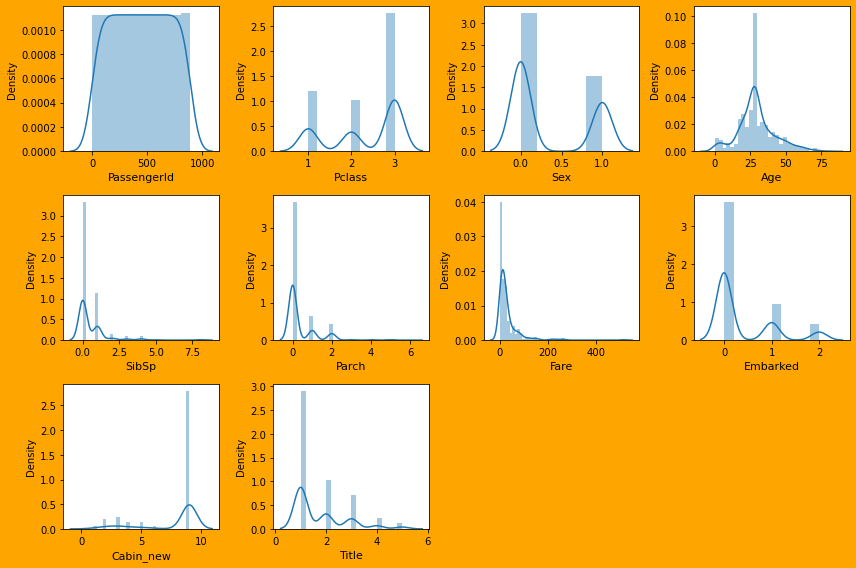

In [73]:
#Lets see data distribution again
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.distplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

From the graph it is clear than maximum number of people who died are in the age group 25 to 40.

Fare is skewed right as few passengers have high fare.

Parch is skewed right as few passenger went with their parents are children

SibSp is also a bit right skewed as those passengers went with their Parents and Children and also maximum number of people didnt went along with their parents and Children

Cabin is the cabin number

In [74]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,7,0,9,1
1,2,1,1,1,38,1,0,71,1,3,3


In [75]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(891, 11)

In [76]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  30,  50,  59,  68,  71,  86,  88,  96, 116,
       118, 119, 149, 150, 159, 164, 167, 171, 180, 182, 201, 233, 245,
       249, 258, 261, 266, 278, 299, 311, 317, 324, 341, 360, 377, 380,
       386, 398, 437, 438, 438, 449, 480, 493, 527, 536, 541, 542, 556,
       557, 567, 599, 610, 626, 630, 632, 638, 647, 660, 672, 678, 679,
       683, 686, 689, 694, 700, 716, 730, 736, 737, 742, 745, 745, 759,
       766, 774, 779, 787, 792, 796, 813, 822, 824, 846, 848, 850, 851,
       858, 863, 885, 886], dtype=int64), array([ 6,  5,  6,  7, 10,  5,  5,  5,  5,  6,  7,  4,  4,  7,  5, 10, 10,
        5,  5,  6,  5,  5,  5,  5,  5, 10, 10,  7,  5,  5,  5,  7,  7, 10,
        5,  7,  6,  7,  7,  5, 10,  6,  6,  7, 10,  5,  4,  7, 10,  5,  5,
       10,  7,  6, 10,  6, 10,  4, 10,  6, 10, 10,  4,  6,  7,  5,  5,  7,
       10,  7,  7,  7,  6,  7,  7,  4, 10, 10, 10,  6,  7,  5,  5, 10,  5,
       10,  5,  5, 10,  5,  4,  6,  5,  6, 10], dtype=int64))


In [77]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(891, 11)
(798, 11)


In [78]:
loss_percentage= ((891-798)/891)*100
loss_percentage

10.437710437710438

10% is huge loss of data, so we will not delete any record, And even if we delete our model will become biased. So lets proceed without deleting any data and also it is clear from our analysis that these outliers can be because few passengers board the Titanic with their Parents and Children, and few of them went along with thier Spouse and Siblings. Also few of them took maximum service, so they have been charged more fare

In [79]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,7,0,9,1
1,2,1,1,1,38,1,0,71,1,3,3


In [80]:
x = df.drop(['Survived'], axis = 1)

# checking the shape of the dataset
print(x.shape)

(891, 10)


# Power Transform

In [81]:
#dataToPlot
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [82]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.503570
SibSp          3.695352
Parch          2.749117
Fare           4.786430
Embarked       1.543397
Cabin_new     -1.546140
Title          1.377974
dtype: float64

In [83]:
X_vif=df.drop(columns=['Survived'])
X_vif

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,3,0,22,1,0,7,0,9,1
1,2,1,1,38,1,0,71,1,3,3
2,3,3,1,26,0,0,7,0,9,2
3,4,1,1,35,1,0,53,0,3,3
4,5,3,0,35,0,0,8,0,9,1
...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,27,0,0,13,0,9,5
887,888,1,1,19,0,0,30,0,2,2
888,889,3,1,28,1,2,23,0,9,2
889,890,1,0,26,0,0,30,1,3,1


# Standard Scaler

In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)

In [85]:
# Finding variance Inflation factor in each scaled column i.e x.shape[1] (1/(1-R2)
# Age and Expereince, you can predict Salary, so Multi colinearity problem is there
# Thats why we first use Standard Scaler to standardise the data and then use vif

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,1.010381,PassengerId
1,2.661295,Pclass
2,2.646578,Sex
3,1.272829,Age
4,1.469583,SibSp
5,1.582002,Parch
6,2.484070,Fare
7,1.049047,Embarked
8,2.072950,Cabin_new
9,3.072045,Title


We dont see any multi collinearity problem here

In [87]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,7,0,9,1
1,2,1,1,1,38,1,0,71,1,3,3


<AxesSubplot:xlabel='Title', ylabel='count'>

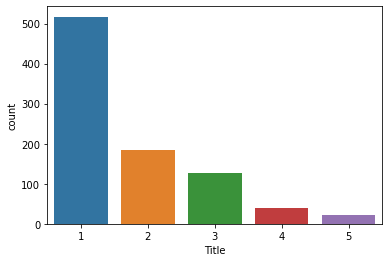

In [88]:
sns.countplot(df['Title'])

# Dividing the dataset into Features and Target

In [89]:
features = df.drop("Survived", axis=1)
target = df["Survived"]

# determining the shape of x and y.
print(features.shape)
print(target.shape)

(891, 10)
(891,)


In [90]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Title
0,1,0,3,0,22,1,0,7,0,9,1


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
from sklearn.metrics import accuracy_score

Lets choose the random state first

# Train-Test Split

In [92]:
for i in range(0,100):
    x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("Survived", sum(pred_test!=0))
    print("NOT Survived", sum(pred_test==0))
    print("At random state : ",i,"The model performs well !")
    print("At random state",i)
    print("Training Accuracy is ",accuracy_score(y_train,pred_train)*100)
    print("Test Accuracy is ",accuracy_score(y_test,pred_test)*100)

Survived 74
NOT Survived 105
At random state :  0 The model performs well !
At random state 0
Training Accuracy is  82.30337078651685
Test Accuracy is  77.09497206703911
Survived 67
NOT Survived 112
At random state :  1 The model performs well !
At random state 1
Training Accuracy is  82.16292134831461
Test Accuracy is  78.77094972067039
Survived 66
NOT Survived 113
At random state :  2 The model performs well !
At random state 2
Training Accuracy is  82.30337078651685
Test Accuracy is  78.2122905027933
Survived 79
NOT Survived 100
At random state :  3 The model performs well !
At random state 3
Training Accuracy is  81.32022471910112
Test Accuracy is  79.3296089385475
Survived 54
NOT Survived 125
At random state :  4 The model performs well !
At random state 4
Training Accuracy is  80.75842696629213
Test Accuracy is  85.47486033519553
Survived 62
NOT Survived 117
At random state :  5 The model performs well !
At random state 5
Training Accuracy is  80.33707865168539
Test Accuracy is  

Test Accuracy is  80.44692737430168
Survived 62
NOT Survived 117
At random state :  49 The model performs well !
At random state 49
Training Accuracy is  80.19662921348315
Test Accuracy is  83.79888268156425
Survived 69
NOT Survived 110
At random state :  50 The model performs well !
At random state 50
Training Accuracy is  81.60112359550563
Test Accuracy is  81.56424581005587
Survived 62
NOT Survived 117
At random state :  51 The model performs well !
At random state 51
Training Accuracy is  82.02247191011236
Test Accuracy is  79.3296089385475
Survived 67
NOT Survived 112
At random state :  52 The model performs well !
At random state 52
Training Accuracy is  81.46067415730337
Test Accuracy is  80.44692737430168
Survived 68
NOT Survived 111
At random state :  53 The model performs well !
At random state 53
Training Accuracy is  81.46067415730337
Test Accuracy is  79.88826815642457
Survived 66
NOT Survived 113
At random state :  54 The model performs well !
At random state 54
Training 

Survived 57
NOT Survived 122
At random state :  97 The model performs well !
At random state 97
Training Accuracy is  81.74157303370787
Test Accuracy is  80.44692737430168
Survived 73
NOT Survived 106
At random state :  98 The model performs well !
At random state 98
Training Accuracy is  82.4438202247191
Test Accuracy is  78.77094972067039
Survived 63
NOT Survived 116
At random state :  99 The model performs well !
At random state 99
Training Accuracy is  82.30337078651685
Test Accuracy is  77.09497206703911


At random state :  99 The model performs well !

Training Accuracy is  82.30337078651685

Test Accuracy is  77.09497206703911

In [93]:
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 99)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 10)
(712,)
(179, 10)
(179,)


In [94]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       113
           1       0.70      0.67      0.68        66

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

Confusion Matrix
 [[94 19]
 [22 44]]


array([[94, 19],
       [22, 44]], dtype=int64)

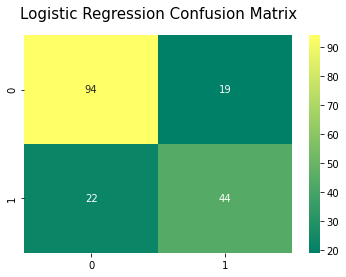

In [95]:
cm = confusion_matrix(y_test,pred_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,cmap="summer")
plt.title('Logistic Regression Confusion Matrix', y=1.05, size=15)
cm

# Cross Validation score for Logistic Regression

In [96]:
pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsScore=cross_val_score(lr,features,target,cv=j)
    lsc=lsScore.mean()
    print("At cv",j)
    print("Cross Validation score is :",lsc*100)
    print("accuracy score is : ",lss*100)
    print('\n')

At cv 2
Cross Validation score is : 80.80818259686602
accuracy score is :  77.09497206703911


At cv 3
Cross Validation score is : 80.47138047138048
accuracy score is :  77.09497206703911


At cv 4
Cross Validation score is : 80.92099947481113
accuracy score is :  77.09497206703911


At cv 5
Cross Validation score is : 81.25666938673028
accuracy score is :  77.09497206703911


At cv 6
Cross Validation score is : 80.69562851442046
accuracy score is :  77.09497206703911


At cv 7
Cross Validation score is : 80.36153683914512
accuracy score is :  77.09497206703911


At cv 8
Cross Validation score is : 80.81060971685972
accuracy score is :  77.09497206703911


At cv 9
Cross Validation score is : 80.69584736251403
accuracy score is :  77.09497206703911




In [97]:
#So with above data,lets select CV as 5, as most of them as same CV
lsScore_selected=cross_val_score(lr,features,target,cv=4).mean()
print("The CV score is :",lsScore_selected,"\n The accuracy score is: ",lss)

The CV score is : 0.8092099947481113 
 The accuracy score is:  0.770949720670391


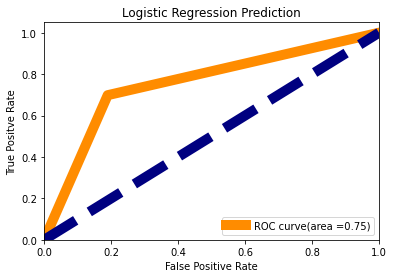

In [98]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Logistic Regression Prediction')
plt.legend(loc="lower right")
plt.show()

In [99]:
score_data = {'Model': ['Logistic Regression'], 'Accuracy': lss*100,'Cross Validation Score':lsScore_selected*100}  

df_LR = pd.DataFrame(score_data)  
df_LR

,Model,Accuracy,Cross Validation Score
0,Logistic Regression,77.094972,80.920999


# SVM Classification

In [103]:
from sklearn.svm import SVC
#svm=SVC()
svm = SVC(random_state=99, gamma="auto")
svm.fit(x_train,y_train)
svm.score(x_train,y_train)
prediction=svm.predict(x_test)
print('Accuracy score of SVM is :',accuracy_score(y_test,prediction))

Accuracy score of SVM is : 0.6201117318435754


Text(0.5, 1.05, 'SVM Confusion Matrix')

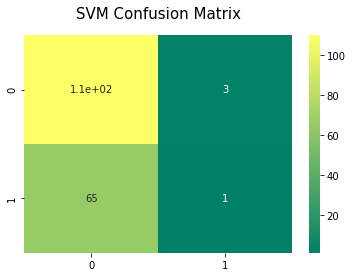

In [104]:
svm_cm=(confusion_matrix(y_test,prediction))
svm_cm
sns.heatmap(svm_cm,annot=True,cmap="summer")
plt.title('SVM Confusion Matrix', y=1.05, size=15)

In [105]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.63      0.97      0.76       113
           1       0.25      0.02      0.03        66

    accuracy                           0.62       179
   macro avg       0.44      0.49      0.40       179
weighted avg       0.49      0.62      0.49       179



In [106]:
scr=cross_val_score(svm,features,target,cv=5)
print('Cross Validation score of SVM model is :',scr.mean())

Cross Validation score of SVM model is : 0.615039859393635


In [107]:
score_data = {
             'Model': ['SVM'], 'Accuracy': (accuracy_score(y_test,prediction))*100,'Cross Validation Score':scr.mean()*100
             }  

df_SVM = pd.DataFrame(score_data)  
df_SVM

,Model,Accuracy,Cross Validation Score
0,SVM,62.011173,61.503986


# Decision Tree Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

# creating model
decTree = DecisionTreeClassifier()
params={'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [109]:
grid_Search=GridSearchCV(estimator=decTree,param_grid=params,cv=5,n_jobs=-1)

grid_Search.fit(x_train,y_train)
print("Best_Params_",grid_Search.best_params_)


Best_Params_ {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10}


In [110]:
decTrees=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=6,max_depth=10,min_samples_split=10)
decTrees.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=10)

In [111]:
decTrees.score(x_train,y_train)

0.8792134831460674

In [112]:
prediction=decTrees.predict(x_test)

In [113]:
print('Accuracy score of Decision Tree is :',accuracy_score(y_test,prediction),"\n")


Accuracy score of Decision Tree is : 0.8268156424581006 



Confusion Matrix
 ----------------------------------- 
 [[100  13]
 [ 18  48]]


Text(0.5, 1.05, 'Decision Tree Confusion Matrix')

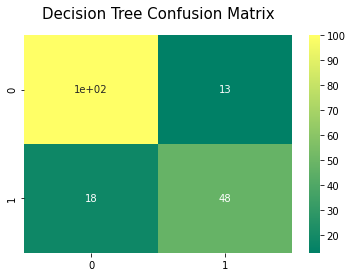

In [114]:
#visualize confusion matrix 
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,prediction))
#accuracy_score(y_test,prediction)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="summer")
plt.title('Decision Tree Confusion Matrix', y=1.05, size=15)

In [115]:
print("Classification Report",classification_report(y_test,prediction))

Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.87       113
           1       0.79      0.73      0.76        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [116]:
dtree=cross_val_score(decTrees,features,target,cv=5)
print('Cross Validation score of Decision Tree model is :',dtree.mean())

Cross Validation score of Decision Tree model is : 0.8092084614901764


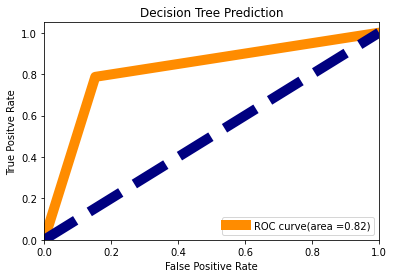

In [117]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(prediction,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Decision Tree Prediction')
plt.legend(loc="lower right")
plt.show()

In [118]:
score_data = {'Model': ['Decision Tree'], 'Accuracy': (accuracy_score(y_test,prediction))*100,'Cross Validation Score':dtree.mean()*100}  

df_dt = pd.DataFrame(score_data)  
df_dt

,Model,Accuracy,Cross Validation Score
0,Decision Tree,82.681564,80.920846


# Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
clf_rf = RandomForestClassifier()
params={'n_estimators':[100,150],
        'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'n_estimators': [100, 150],
 'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [120]:
grd=GridSearchCV(clf_rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params_",grd.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}


In [125]:
#Lets reinsantiate with best params now
clf_rf=grd.best_estimator_


 Confusion Matrix => 
 [[100  13]
 [ 19  47]]


Text(0.5, 1.05, 'Random Forest Confusion Matrix')

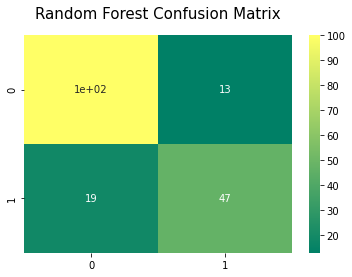

In [126]:
clf_rf.fit(x_train,y_train)
y_pred=clf_rf.predict(x_test)
rf_conf_matrix=confusion_matrix(y_test,y_pred)
print('\n Confusion Matrix => \n',rf_conf_matrix)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="summer")
plt.title('Random Forest Confusion Matrix', y=1.05, size=15)

In [127]:
print('\n Accuracy of Random Forest is :',accuracy_score(y_test,y_pred))


 Accuracy of Random Forest is : 0.8212290502793296


In [128]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       113
           1       0.78      0.71      0.75        66

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [129]:
rf_cv=cross_val_score(clf_rf,features,target,cv=5)
print('Cross Validation score of Random Forest is :',rf_cv.mean())

Cross Validation score of Random Forest is : 0.8204318624066286


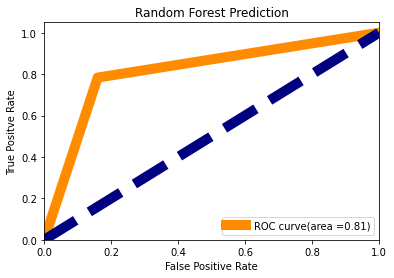

In [130]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Random Forest Prediction')
plt.legend(loc="lower right")
plt.show()

In [131]:
score_data = {'Model': ['Random Forest'], 'Accuracy': (accuracy_score(y_test,y_pred))*100,'Cross Validation Score':rf_cv.mean()*100}  

df_RF = pd.DataFrame(score_data)  
df_RF

,Model,Accuracy,Cross Validation Score
0,Random Forest,82.122905,82.043186


# Naive Bye Classification

In [132]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_train,y_train)
prediction=nb.predict(x_test)
print('Accuracy score of Naive Byes Classifier is :',accuracy_score(y_test,prediction))

Accuracy score of Naive Byes Classifier is : 0.7486033519553073


Confusion Matrix
 ----------------------------------- 
 [[86 27]
 [18 48]]


Text(0.5, 1.05, 'Naive Byes COnfusion Matrix')

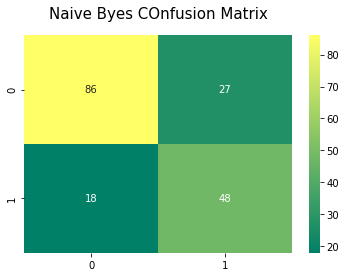

In [133]:
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,prediction))
#accuracy_score(y_test,prediction)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="summer")
plt.title('Naive Byes COnfusion Matrix', y=1.05, size=15)

In [134]:
print("Classification Report : \n",classification_report(y_test,prediction))

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       113
           1       0.64      0.73      0.68        66

    accuracy                           0.75       179
   macro avg       0.73      0.74      0.74       179
weighted avg       0.76      0.75      0.75       179



In [135]:
naive=cross_val_score(nb,features,target,cv=5)
print('Cross Validation score of Decision Tree model is :',naive.mean())

Cross Validation score of Decision Tree model is : 0.7744397715146569


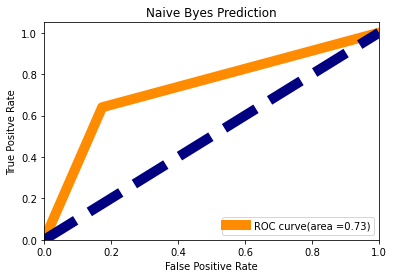

In [136]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(prediction,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Naive Byes Prediction')
plt.legend(loc="lower right")
plt.show()

In [137]:
score_data = {'Model': ['Naive Byes'], 'Accuracy': (accuracy_score(y_test,prediction))*100,'Cross Validation Score':naive.mean()*100}  

df_NB = pd.DataFrame(score_data)  
df_NB


,Model,Accuracy,Cross Validation Score
0,Naive Byes,74.860335,77.443977


In [143]:
modelDF=pd.concat([df_LR,df_SVM,df_dt,df_RF,df_NB]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,Accuracy,Cross Validation Score
0,Logistic Regression,77.094972,80.920999
1,SVM,62.011173,61.503986
2,Decision Tree,82.681564,80.920846
3,Random Forest,82.122905,82.043186
4,Naive Byes,74.860335,77.443977


Random Forest performs the best, so we will choose this model for our problem. Lets Hyper Tune Random Forest now

# HyperParameter with RandomforestClassifier

In [144]:
#Number of trees in the random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=800,num=10)]

#Number of features to be considerd at every split
max_features=['auto','sqrt','log2']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,700,10)]

#Number of samples required for split a node
min_samples_split=[2,5,10,14]
#Number of samples required at each leaf node
min_samples_leaf=[2,3,6,8,10]

random_grid={
            "n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "criterion":['entrophy','gini']
            }

random_grid

{'n_estimators': [100, 177, 255, 333, 411, 488, 566, 644, 722, 800],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 86, 163, 240, 316, 393, 470, 546, 623, 700],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [2, 3, 6, 8, 10],
 'criterion': ['entrophy', 'gini']}

In [146]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
random_model=RandomizedSearchCV(rf,param_distributions=random_grid,cv=5,n_iter=100,verbose=3,n_jobs=-1,random_state=42)

In [147]:
random_model.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entrophy', 'gini'],
                                        'max_depth': [10, 86, 163, 240, 316,
                                                      393, 470, 546, 623, 700],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 177, 255, 333,
                                                         411, 488, 566, 644,
                                                         722, 800]},
                   random_state=42, verbose=3)

In [148]:
random_model.best_estimator_

RandomForestClassifier(max_depth=623, min_samples_leaf=2, n_estimators=488)

In [149]:
random_model.best_params_

{'n_estimators': 488,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 623,
 'criterion': 'gini'}

In [150]:
random_pred1=random_model.best_estimator_
random_pred1

RandomForestClassifier(max_depth=623, min_samples_leaf=2, n_estimators=488)

In [151]:
rand_pred=random_pred1.predict(x_test)

Confusion Matrix
 ----------------------------------- 
 [[100  13]
 [ 19  47]]


Text(0.5, 1.05, 'RandomForestClassifier Confusion Matrix')

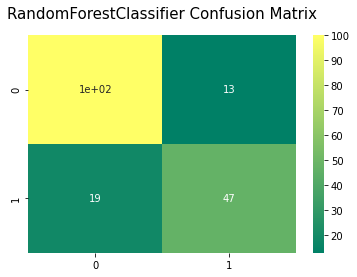

In [152]:
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,rand_pred))
sns.heatmap(confusion_matrix(y_test,rand_pred),annot=True,cmap="summer")
plt.title('RandomForestClassifier Confusion Matrix', y=1.05, size=15)

In [153]:
print("Accuracy Score",accuracy_score(y_test,rand_pred),"\n")
print("Classification Report",classification_report(y_test,rand_pred))

Accuracy Score 0.8212290502793296 

Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       113
           1       0.78      0.71      0.75        66

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



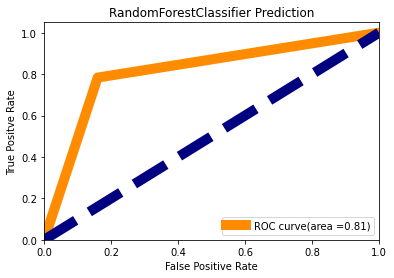

In [154]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(rand_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('RandomForestClassifier Prediction')
plt.legend(loc="lower right")
plt.show()

In [155]:
score_data = {'HyperTuning': ['Random Forest Classifier'], 'Accuracy': (accuracy_score(y_test,rand_pred))*100}  

df_RFC = pd.DataFrame(score_data)  
df_RFC

,HyperTuning,Accuracy
0,Random Forest Classifier,82.122905


# Model Selection

We can see that Hyper Parameter tuning with Random Forest gives us 82.12% accuracy, so we will select this model as the data is not that large, otherwise we would go for Random Forest to save time and cost as it gives 81.93% ver close to Hyper Paramter tuning with Random Forest Classifier

# Saving the Model

In [157]:
from joblib import dump , load
dump(rf,'Titanic.joblib')
load_rf=load('Titanic.joblib')

In [158]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'Titanic.joblib')

In [159]:
import joblib
joblib.dump(dt, filename) 
#['...Titanic.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmp1pvv2zbn\\Titanic.joblib']

In [160]:
joblib.load(filename)

RandomForestClassifier()